In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [48]:
class SignLanguage:
    def __init__(self):
        self.model = None
        
        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()
    
    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """
        
        #create sequential model & add model layers
        model = Sequential()
        model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
        model.add(MaxPooling2D((2, 2)))
        model.add(Conv2D(32, kernel_size=3, activation='relu'))
        model.add(MaxPooling2D((2, 2)))
        model.add(Flatten())
        model.add(Dense(25, activation='softmax'))
            
        # TODO: Compile the model with categorical_crossentropy
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
        
        self.model = model
    
    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)
        
        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        # TODO : split into training and validation set
        # TODO : reshape each example into a 2D image (28, 28, 1)
        
        reshapedImages = [np.reshape(curVec/255.0,(28,28,1)) for curVec in images]
        reshapedLabels = [np.zeros(25) for i in range(len(labels))]
        for i in range(len(labels)):
          reshapedLabels[i][labels[i]]+= 1
        
        finalObjects = list(zip(reshapedImages,reshapedLabels))

        # Shuffle data
        np.random.shuffle(finalObjects)
        shuffledImages = list(zip(*finalObjects))[0]
        shuffledLabels = list(zip(*finalObjects))[1]

        # Get the train/validation split location
        splitLoc = int(np.floor(.8 * len(finalObjects)))
        
        self.data = {
            "train": (np.array(shuffledImages[:splitLoc]),np.array(shuffledLabels[:splitLoc])), # (x_train, y_train)
            "test" : (np.array(shuffledImages[splitLoc+1:]),np.array(shuffledLabels[splitLoc+1:])) # (x_test, y_test)
        }
    
    def train(self, batch_size:int=64, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.
        
        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        
        # trainX = list(self.data["train"][0])
        # trainY = list(self.data["train"][1])
        # testX = list(self.data["test"][0])
        # testY = list(self.data["test"][1])
        #print("get sets #1")
        #train_set = tf.data.Dataset.from_tensor_slices(  list(self.data["train"]) )
        #print("get sets #2")
        #validation_set = tf.data.Dataset.from_tensor_slices(  list(self.data["test"]) )
        #print("begin the fitting")
        #history = self.model.fit(train_set, epochs=epochs, batch_size=batch_size, validation_data=validation_set, verbose=verbose)

        print(np.shape(self.data["train"][0]))
        print(np.shape(self.data["train"][1]))
        print(self.data["train"][1])


        history = self.model.fit(self.data["train"][0], self.data["train"][1], epochs=epochs, batch_size=batch_size, validation_data=(self.data["test"][0],self.data["test"][1]), verbose=verbose)
        print("fitting finished")
        return history
    
    def predict(self, data):
        """
        Use the trained model to predict labels for test data.
        
        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """
        
        # Don't forget to normalize the data in the same way as training data
        # self.model.predict() and np.argmax( , axis=1) might help
        
        reshapedTestData = np.array([np.reshape(curVec/255.0,(28,28,1)) for curVec in data])
        
        predictionWeights = self.model.predict(reshapedTestData)

        y_pred = [np.argmax(weights) for weights in predictionWeights]
        
        return y_pred
    
    def visualize_data(self, data):
        """
        Visualizing the hand gestures
        
        :param data: numpy array of images
        """
        if data is None: return
        
        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object
        
        :param history: return value from model.fit()
        """
        if history is None: return
        
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

In [49]:
# Grading Part

In [50]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [51]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

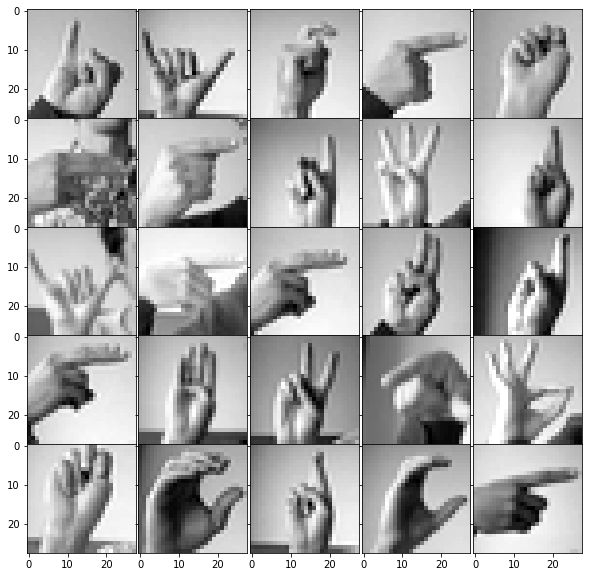

In [52]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

(21964, 28, 28, 1)
(21964, 25)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 1/30
344/344 [==============================] - 2s 6ms/step - loss: 1.4542 - accuracy: 0.5892 - val_loss: 0.5440 - val_accuracy: 0.8505
Epoch 2/30
344/344 [==============================] - 2s 5ms/step - loss: 0.2869 - accuracy: 0.9213 - val_loss: 0.1799 - val_accuracy: 0.9545
Epoch 3/30
344/344 [==============================] - 2s 5ms/step - loss: 0.0846 - accuracy: 0.9860 - val_loss: 0.0532 - val_accuracy: 0.9944
Epoch 4/30
344/344 [==============================] - 2s 5ms/step - loss: 0.0305 - accuracy: 0.9981 - val_loss: 0.0234 - val_accuracy: 0.9987
Epoch 5/30
344/344 [==============================] - 2s 5ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0117 - val_accuracy: 0.9996
Epoch 6/30
344/344 [==============================] - 2s 5ms/step - loss: 0.0074 - accuracy: 0.9999 - v

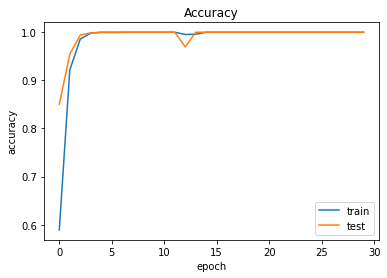

In [53]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [54]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 [==============================] - 0s 2ms/step
0.9270775237032906
